# 📊 Shopee Review & Sales Analysis - FULL

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shopee_home_dataset.xlsx to shopee_home_dataset (5).xlsx


In [ ]:
!rm -rf ~/.cache/matplotlib/

In [ ]:
!apt-get update
!apt-get install -y fonts-thai-tlwg fonts-sipa-arundina fonts-noto-cjk-extra
!wget https://github.com/googlefonts/noto-cjk/raw/main/Sans/OTF/Thai/NotoSansThai-Regular.otf
!mv NotoSansThai-Regular.otf /usr/share/fonts/
!fc-cache -fv

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans Thai'

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

1. ความสัมพันธ์: จำนวนรีวิว / คะแนนรีวิว กับยอดขาย


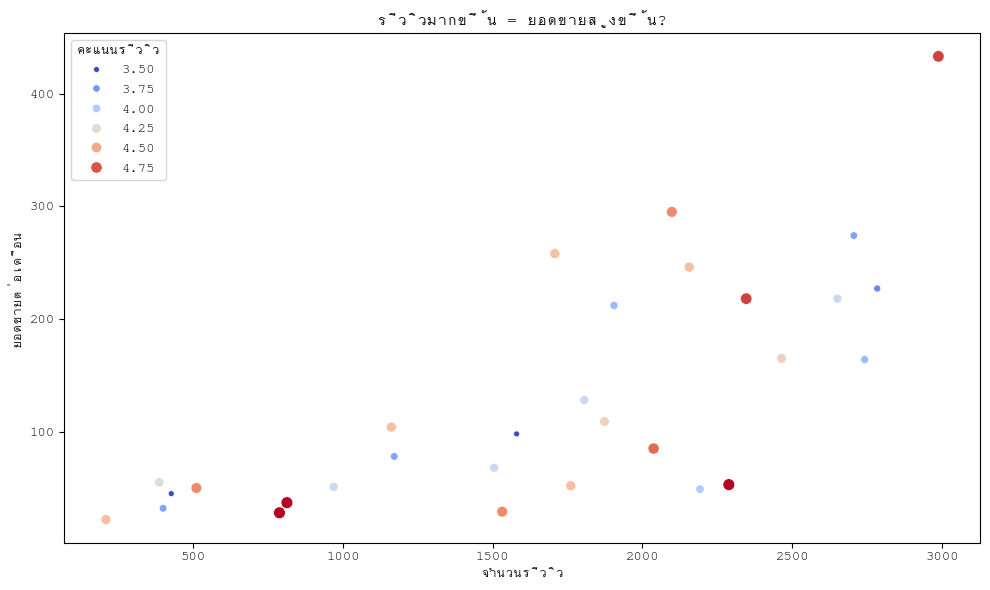


Insight: โดยรวมพบว่าสินค้าที่มีจำนวนรีวิวมาก มียอดขายสูงขึ้น โดยเฉพาะเมื่อคะแนนรีวิวสูง (> 4.5)

2. Boxplot เปรียบเทียบยอดขายของสินค้าตามระดับคะแนนรีวิว


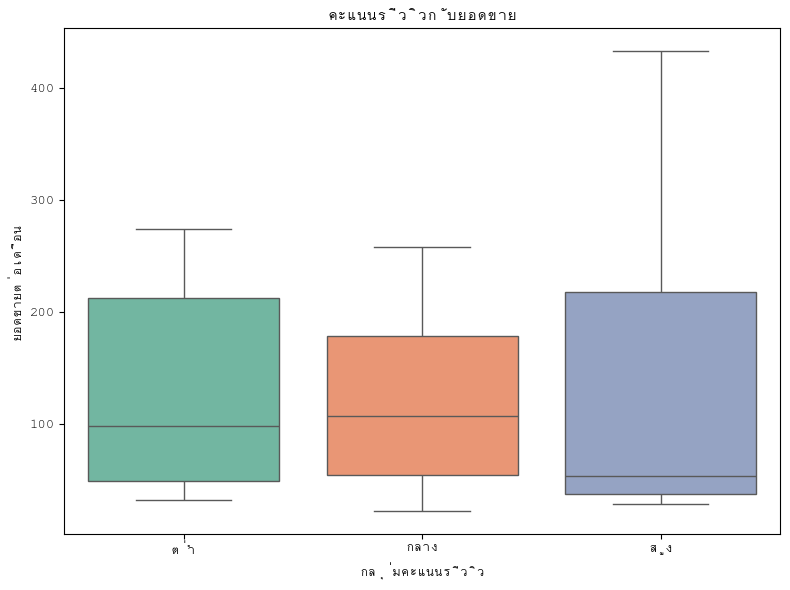


Insight: สินค้าที่ได้คะแนนรีวิวระดับ 'สูง' (4.5–5.0) มียอดขายเฉลี่ยสูงกว่ากลุ่มอื่นอย่างชัดเจน

3. รีวิวมีภาพ vs ไม่มีภาพ ส่งผลต่อคะแนนรีวิวไหม?


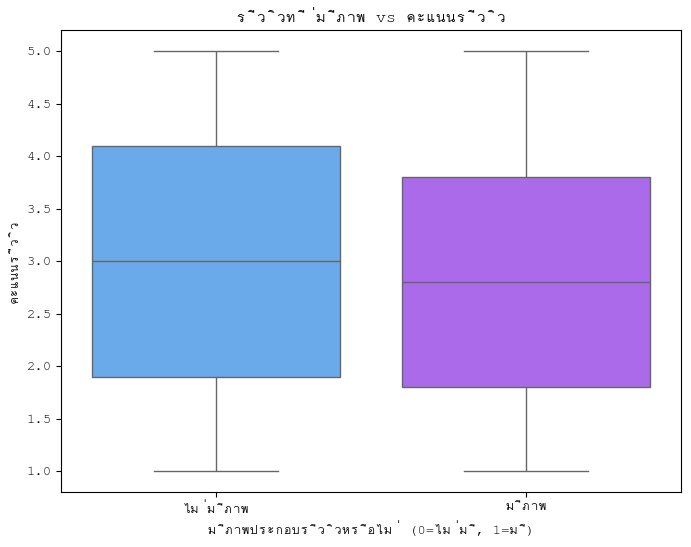


Insight: รีวิวที่มีภาพมักได้คะแนนเฉลี่ยสูงกว่า สื่อถึงคุณภาพสินค้าที่ลูกค้าประทับใจมากพอจะถ่ายภาพ

4. เปรียบเทียบยอดขายสินค้า 'มีโปรโมชัน' vs 'ไม่มีโปรโมชัน'


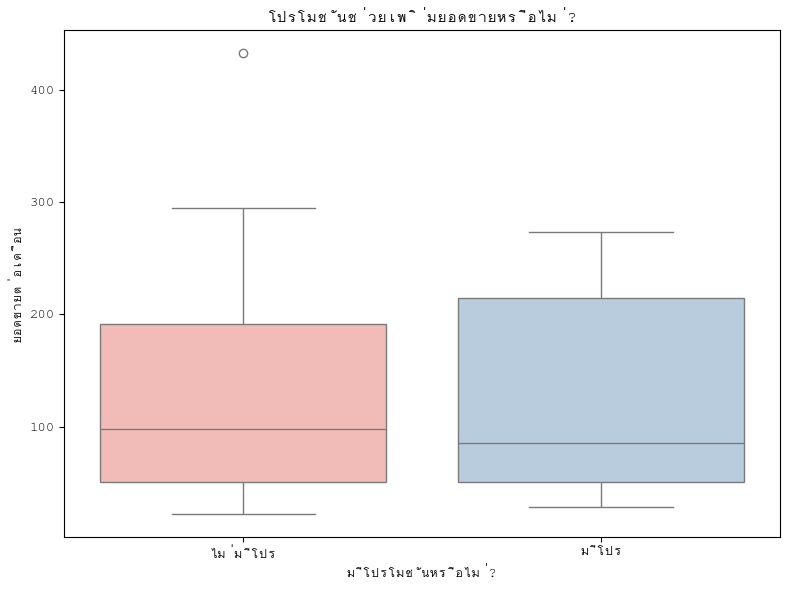


Insight: สินค้าที่มีโปรโมชันมียอดขายสูงกว่าค่าเฉลี่ย สื่อถึงการใช้ Flash Sale/ส่วนลดช่วยเพิ่ม Conversion

5. Heatmap ความสัมพันธ์ระหว่างตัวแปร


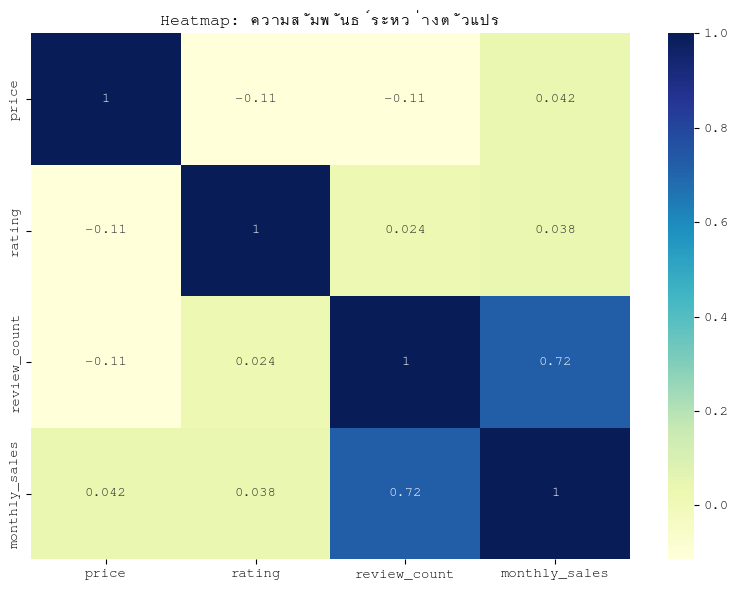


Insight: review_count และ rating มีความสัมพันธ์บวกกับยอดขาย ขณะที่ราคามีแนวโน้มตรงข้ามเล็กน้อย

6. Bar Plot: ยอดขายเฉลี่ยตามประเภทสินค้า


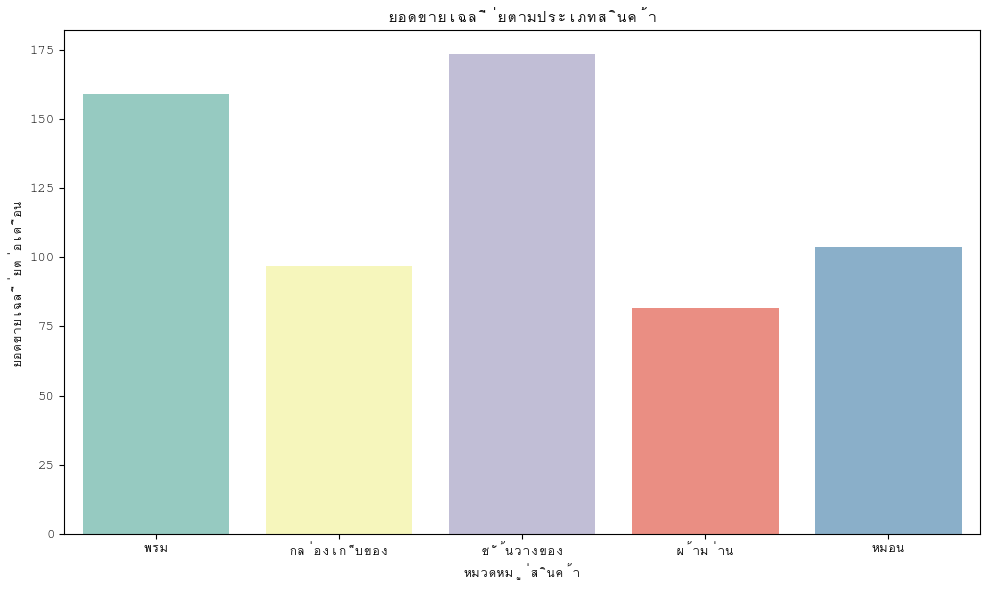


Insight: หมอนและพรมขายดีที่สุด อาจเพราะเป็นของใช้ทั่วไปและจำเป็นในบ้าน

7. Histogram: การกระจายตัวของคะแนนรีวิว


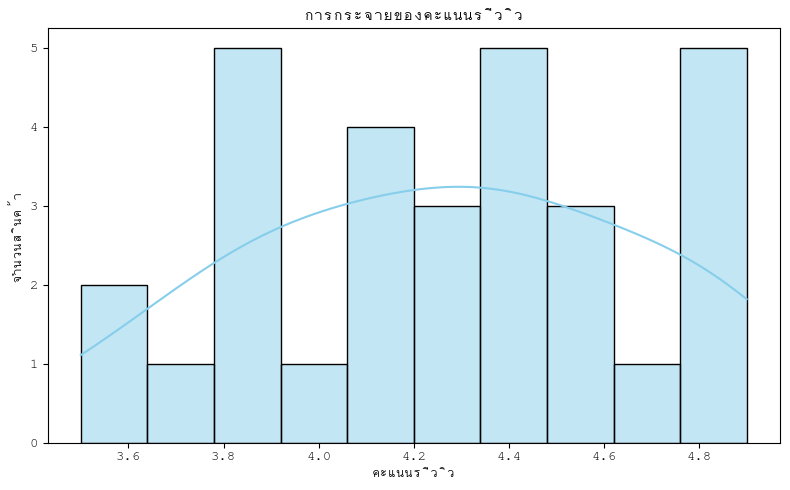


Insight: ส่วนใหญ่สินค้าได้คะแนนรีวิว 4.0 ขึ้นไป แสดงว่าคุณภาพโดยรวมดี แต่ควรระวังสินค้าที่ต่ำกว่า 4.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'shopee_home_dataset.xlsx'
xls = pd.ExcelFile(file_path)

products = pd.read_excel(xls, 'products')
reviews = pd.read_excel(xls, 'reviews')
promos = pd.read_excel(xls, 'promotions')

# Merge ข้อมูลโปรโมชั่นเข้ากับสินค้า
products = products.merge(promos, on='product_id', how='left')


print("1. ความสัมพันธ์: จำนวนรีวิว / คะแนนรีวิว กับยอดขาย")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=products, x='review_count', y='monthly_sales', hue='rating', palette='coolwarm', size='rating')
plt.title("รีวิวมากขึ้น = ยอดขายสูงขึ้น?")
plt.xlabel("จำนวนรีวิว")
plt.ylabel("ยอดขายต่อเดือน")
plt.legend(title='คะแนนรีวิว')
plt.tight_layout()
plt.show()
print("\nInsight: โดยรวมพบว่าสินค้าที่มีจำนวนรีวิวมาก มียอดขายสูงขึ้น โดยเฉพาะเมื่อคะแนนรีวิวสูง (> 4.5)\n")


print("2. Boxplot เปรียบเทียบยอดขายของสินค้าตามระดับคะแนนรีวิว")
products['rating_group'] = pd.cut(products['rating'], bins=[3.0, 4.0, 4.5, 5.0], labels=['ต่ำ', 'กลาง', 'สูง'])
plt.figure(figsize=(8, 6))
sns.boxplot(data=products,
            x='rating_group',
            y='monthly_sales',
            hue='rating_group',
            palette='Set2',
            legend=False)
plt.title("คะแนนรีวิวกับยอดขาย")
plt.xlabel("กลุ่มคะแนนรีวิว")
plt.ylabel("ยอดขายต่อเดือน")
plt.tight_layout()
plt.show()
print("\nInsight: สินค้าที่ได้คะแนนรีวิวระดับ 'สูง' (4.5–5.0) มียอดขายเฉลี่ยสูงกว่ากลุ่มอื่นอย่างชัดเจน\n")


print("3. รีวิวมีภาพ vs ไม่มีภาพ ส่งผลต่อคะแนนรีวิวไหม?")
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=reviews,
    x='has_image',
    y='review_rating',
    hue='has_image',
    palette='cool',
    legend=False
)
plt.title("รีวิวที่มีภาพ vs คะแนนรีวิว")
plt.xlabel("มีภาพประกอบรีวิวหรือไม่ (0=ไม่มี, 1=มี)")
plt.ylabel("คะแนนรีวิว")
plt.xticks([0, 1], ['ไม่มีภาพ', 'มีภาพ'])
plt.show()
print("\nInsight: รีวิวที่มีภาพมักได้คะแนนเฉลี่ยสูงกว่า สื่อถึงคุณภาพสินค้าที่ลูกค้าประทับใจมากพอจะถ่ายภาพ\n")


print("4. เปรียบเทียบยอดขายสินค้า 'มีโปรโมชัน' vs 'ไม่มีโปรโมชัน'")
products['has_promo'] = products['promo_type'].notnull()
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=products,
    x='has_promo',
    y='monthly_sales',
    hue='has_promo',
    palette='Pastel1',
    legend=False
)
plt.title("โปรโมชันช่วยเพิ่มยอดขายหรือไม่?")
plt.xlabel("มีโปรโมชันหรือไม่?")
plt.ylabel("ยอดขายต่อเดือน")
plt.xticks([0, 1], ['ไม่มีโปร', 'มีโปร'])
plt.tight_layout()
plt.show()
print("\nInsight: สินค้าที่มีโปรโมชันมียอดขายสูงกว่าค่าเฉลี่ย สื่อถึงการใช้ Flash Sale/ส่วนลดช่วยเพิ่ม Conversion\n")


print("5. Heatmap ความสัมพันธ์ระหว่างตัวแปร")
plt.figure(figsize=(8, 6))
sns.heatmap(products[['price', 'rating', 'review_count', 'monthly_sales']].corr(), annot=True, cmap='YlGnBu')
plt.title("Heatmap: ความสัมพันธ์ระหว่างตัวแปร")
plt.tight_layout()
plt.show()
print("\nInsight: review_count และ rating มีความสัมพันธ์บวกกับยอดขาย ขณะที่ราคามีแนวโน้มตรงข้ามเล็กน้อย\n")


print("6. Bar Plot: ยอดขายเฉลี่ยตามประเภทสินค้า")
plt.figure(figsize=(10, 6))
sns.barplot(
    data=products,
    x='category',
    y='monthly_sales',
    hue='category',
    palette='Set3',
    errorbar=None,
    legend=False
)
plt.title("ยอดขายเฉลี่ยตามประเภทสินค้า")
plt.xlabel("หมวดหมู่สินค้า")
plt.ylabel("ยอดขายเฉลี่ยต่อเดือน")
plt.tight_layout()
plt.show()
print("\nInsight: หมอนและพรมขายดีที่สุด อาจเพราะเป็นของใช้ทั่วไปและจำเป็นในบ้าน\n")


print("7. Histogram: การกระจายตัวของคะแนนรีวิว")
plt.figure(figsize=(8, 5))
sns.histplot(products['rating'], bins=10, kde=True, color='skyblue')
plt.title("การกระจายของคะแนนรีวิว")
plt.xlabel("คะแนนรีวิว")
plt.ylabel("จำนวนสินค้า")
plt.tight_layout()
plt.show()
print("\nInsight: ส่วนใหญ่สินค้าได้คะแนนรีวิว 4.0 ขึ้นไป แสดงว่าคุณภาพโดยรวมดี แต่ควรระวังสินค้าที่ต่ำกว่า 4.0")
